### ASTROQUERY (Not Used)

In [29]:
from astroquery.mast import MastMissions
from astroquery.mast import Observations 

missions = MastMissions(mission = 'jwst')
print(f'Missions:{missions.mission}')
print(f'Service:{missions.service}')

Missions:jwst
Service:search


In [26]:
import csv
columns = missions.get_column_list()

with open('columns_list.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for col_name in columns:
        writer.writerow([col_name])

In [34]:
print(Observations.get_query_columns())

AttributeError: 'ObservationsClass' object has no attribute 'get_query_columns'

In [31]:
mast_query = """
SELECT targ_ra, targ_dec, instrume, targcat, targtype, targname
FROM mast.jwst.main
WHERE targcat IS 'Galaxy'
"""

mast_job = Observations.query_criteria(adql_query=mast_query)
results = mast_job
results.write("jwst_mast_targets.csv", format="csv", overwrite=True)

InvalidQueryError: At least one non-positional criterion must be supplied.

In [4]:
import pyvo

service = pyvo.dal.TAPService("https://jwst.esac.esa.int/server/tap")
print(service.tables)

#for table in service.tables:
#    print(table.name)

table = service.tables['jwst.main']
for col in table.columns:
    print(col.name)


algorithm_name
calibrationlevel
collection
creatorid
dataproducttype
energy_bandpassname
energy_bounds
energy_bounds_lower
energy_bounds_upper
energy_bounds_width
energy_dimension
energy_energybands
energy_freqsamplesize
energy_freqwidth
energy_resolvingpower
energy_restwav
energy_samplesize
energy_transition_species
energy_transition_transition
environment_ambienttemp
environment_elevation
environment_humidity
environment_photometric
environment_seeing
environment_tau
environment_wavelengthtau
instrument_keywords
instrument_name
intent
max_cal_level
members
metrics_background
metrics_backgroundstddev
metrics_fluxdensitylimit
metrics_maglimit
metrics_sourcenumberdensity
obs_accmetachecksum
obs_lastmodified
obs_maxlastmodified
obs_metachecksum
obs_metarelease
observationid
observationuri
obsid
parenturi
plane_accmetachecksum
plane_datarelease
plane_lastmodified
plane_maxlastmodified
plane_metachecksum
plane_metarelease
planeid
planeuri
polarization_dimension
polarization_states
position

In [5]:
query = """
SELECT DISTINCT target_keywords
FROM jwst.main
WHERE target_keywords IS NOT NULL
"""
job = service.search(query)
data = job.to_table()
data

target_keywords
object
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=(1999 OX3)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=(2003 GH55)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=(2008 FC76)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=(2010 VZ98)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=Borasisi|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00014113049 -0.00012076304 359.99954120023 0.00056554388 359.99950115267 0.00052998318 0.00010110121 -0.00015634466|STANDARDTARGETNAME=Lempo|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00028348359 -0.00003460651 359.99969997996 0.00063584023 359.99905778801 0.0000634091 359.99964125707 -0.00060725182|STANDARDTARGETNAME=Bernardinelli-Bernstein (C/2014|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Comet|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00028348359 -0.00003460651 359.99969997996 0.00063584023 359.99905778801 0.0000634091 359.99964125707 -0.00060725182|STANDARDTARGETNAME=Wierzchos (C/2024 E1)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Offset|TOO=N
MOVINGTARGET=True|SREGION=POLYGON ICRS 0.00030085717 -0.00030348683 359.99970092691 0.0003828201 359.99966087935 0.00034725939 0.00026082789 -0.00033906845|STANDARDTARGETNAME=(1999 OX3)|TARGETCATEGORY=Solar System|TARGETKEYWORDS=Asteroid|TOO=N


In [12]:
import re

target_categories = set()
pattern = re.compile(r'TARGETCATEGORY=([^|]+)')

for row in data['target_keywords']:
    match = pattern.search(row)
    if match:
        target_categories.add(match.group(1))

print("Unique TARGETCATEGORY values:")
for cat in sorted(target_categories):
    print(cat)


Unique TARGETCATEGORY values:
Calibration
Clusters of Galaxies
Galaxy
ISM
Solar System
Star
Stellar Cluster
Unidentified


calibrationlevel
dataproducttype
energy_bandpassname
energy_bounds
environment_seeing
instrument_name
obsid
productid
"public"
target_dec
target_keywords
target_moving
target_name
target_ra
target_redshift
target_standard
target_type
time_exposure
time_resolution
time_samplesize

In [6]:
query = """
SELECT target_name, target_ra, target_dec, obsid, target_keywords, obsid, target_redshift, "public", "calibrationlevel", target_type, "time_exposure"
FROM jwst.main
WHERE LOWER(target_keywords) LIKE '%targetcategory=quasar%'
"""
job = service.search(query)
results = job.to_table()
results.write("jwst_qso_targets.csv", format="csv", overwrite=True)


In [6]:
import pyvo
from astropy.table import vstack

service = pyvo.dal.TAPService("https://jwst.esac.esa.int/server/tap")

batch_size = 10000
offset = 0
all_results = []

while True:
    query = f"""
    SELECT TOP {batch_size} 
           target_name, target_ra, target_dec, obsid, target_keywords, target_redshift, "public", 
           calibrationlevel, target_type, time_exposure
    FROM jwst.main
    OFFSET {offset}
    """
    print(f"Fetching batch starting at offset {offset}...")
    result = service.run_async(query).to_table()
    
    if len(result) == 0:
        break  # All done

    all_results.append(result)
    offset += batch_size

# Combine all and save
final_table = vstack(all_results)
final_table.write("jwst_targets.csv", format="csv", overwrite=True)



Fetching batch starting at offset 0...
Fetching batch starting at offset 10000...
Fetching batch starting at offset 20000...
Fetching batch starting at offset 30000...
Fetching batch starting at offset 40000...
Fetching batch starting at offset 50000...
Fetching batch starting at offset 60000...
Fetching batch starting at offset 70000...
Fetching batch starting at offset 80000...
Fetching batch starting at offset 90000...
Fetching batch starting at offset 100000...
Fetching batch starting at offset 110000...
Fetching batch starting at offset 120000...
Fetching batch starting at offset 130000...
Fetching batch starting at offset 140000...
Fetching batch starting at offset 150000...
Fetching batch starting at offset 160000...
Fetching batch starting at offset 170000...
Fetching batch starting at offset 180000...
Fetching batch starting at offset 190000...
Fetching batch starting at offset 200000...
Fetching batch starting at offset 210000...
Fetching batch starting at offset 220000...
Fe

DALServiceError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [35]:
import pyvo

service = pyvo.dal.TAPService("https://mast.stsci.edu/api/v0/invoke/tap")

query = """
SELECT s_ra AS targ_ra,
       s_dec AS targ_dec,
       instrument_name AS instrume,
       target_class AS targcat,
       target_type AS targtype,
       target_name AS targname
FROM obs
WHERE obs_collection = 'JWST'
  AND UPPER(target_class) = 'GALAXY'
"""

job = service.search(query)
results = job.to_table()
print(results)
results.write("mast_jwst_galaxies.csv", format="csv", overwrite=True)


DALFormatError: SSLError: HTTPSConnectionPool(host='mast.stsci.edu', port=443): Max retries exceeded with url: /api/v0/invoke/tap/sync (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1000)')))

## Cross-Matched Data from TOPCAT

In [1]:
import pandas as pd

df = pd.read_csv("crossmatched_data.csv")
df['Observation ID'].to_csv('OBSID.csv', index=False, header=False, sep='\n')
#df.sort_values(by='Instrument', inplace=True)

In [2]:
instru = df['Instrument'].unique()
print(instru)

['NIRSPEC/IFU' 'MIRI/SLIT' 'MIRI/IFU' 'NIRSPEC/SLIT' 'NIRCAM/IMAGE'
 'MIRI/IMAGE']


In [3]:
dfs = {value: group for value, group in df.groupby("Instrument")}


In [16]:
df1 = pd.read_csv("crossmatched_availablility_sorted_data.csv")
pd.Series(df1.columns).to_csv('columns.csv', index=False, header=False)


In [5]:
df1.sort_values(by='Public', inplace=True)

In [6]:
df1["Public"] = df1["Public"].astype(str)

public_df = df1[df1["Public"].str.lower() == 'true']
private_df = df1[df1["Public"].str.lower() == 'false']


public_df.to_csv("public_data_jwst.csv", index=False)
print("Number of public data entries:", len(public_df))
print("Number of non-public data entries:", len(private_df))

Number of public data entries: 54
Number of non-public data entries: 32


In [7]:
public_df['Observation ID_1'].to_csv("OBSID_PUBLIC.csv", index = False, header = False, sep=',')

In [8]:
public_df['Target name_1'].to_csv("Target_name_public.csv", index = False, header = False, sep=',')

In [9]:
from astroquery.mast import MastMissions

missions = MastMissions(mission='jwst')

results = missions.query_region()

TypeError: MastMissionsClass.query_region_async() missing 1 required positional argument: 'coordinates'

In [10]:
public_df.sort_values(by='Instrument_1', inplace=True)
public_df.to_csv("public_data_jwst_sorted.csv", index=False)

/tmp/ipykernel_16099/3078059446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_df.sort_values(by='Instrument_1', inplace=True)


## To Find BAL quasars from the available data in JWST

In [12]:
bal_public_df = public_df[public_df["BAL_PROB"]>0.5]

In [13]:
bal_df = df1[df1["BAL_PROB"]>0.5]

In [14]:
bal_public_df.to_csv("public_data_jwst_bal.csv", index=False)
bal_df.to_csv("all_data_jwst_bal.csv", index=False)

In [17]:
non_bal_public_df = public_df[public_df["BAL_PROB"]<=0.5]
non_bal_df = df1[df1["BAL_PROB"]<=0.5]
non_bal_public_df.to_csv("public_data_jwst_non_bal.csv", index=False)
non_bal_df.to_csv("all_data_jwst_non_bal.csv", index=False)

In [18]:
bal_public_df['Observation ID_1'].to_csv("OBSID_PUBLIC_BAL.csv", index = False, header = False, sep=',')
bal_df['Observation ID_1'].to_csv("OBSID_ALL_BAL.csv", index = False, header = False, sep=',')

In [19]:
non_bal_public_df['Observation ID_1'].to_csv("OBSID_PUBLIC_NON_BAL.csv", index = False, header = False, sep=',')
non_bal_df['Observation ID_1'].to_csv("OBSID_ALL_NON_BAL.csv", index = False, header = False, sep=',')

In [20]:
df1['Observation ID_1'].to_csv("OBSID_ALL.csv", index = False, header = False, sep=',')

### Plotting Spectra

### s3d

In [13]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

data = fits.open('jw02057-o010_t005_nirspec_g140m-f100lp_s3d.fits')
data.info()

Filename: jw02057-o010_t005_nirspec_g140m-f100lp_s3d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     369   ()      
  1  SCI           1 ImageHDU        92   (41, 45, 1447)   float32   
  2  ERR           1 ImageHDU        12   (41, 45, 1447)   float32   
  3  DQ            1 ImageHDU        12   (41, 45, 1447)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (41, 45, 1447)   float32   
  5  HDRTAB        1 BinTableHDU    506   4R x 248C   [23A, 5A, 3A, 39A, 6A, 13A, 3A, 5A, 6A, 7A, 13A, 4A, L, D, D, 32A, 49A, 85A, 9A, 2A, 32A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 24A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 5A, 1A, 5A, D, D, D, D, D, D, D, D, 7A, 7A, 4A, 6A, 5A, K, 4A, 3A, D, D, D, D, D, D, D, K, 5A, 7A, D, D, D, D, D, D, D, D, D, 12A, K, K, K, K, K, K, K, K, K, D, D, D, D, D, D, D, D, D, K, K, L, L, K, K, K, K, D, D, L, 4A, K, K, K, K, K, K, 14A, K, K, D, D, 7A, 10A, D, D, D, D, D, 

In [14]:
spectra = data[4].data
print(type(spectra))
print(spectra.dtype)
print(spectra.shape)

<class 'numpy.ndarray'>
>f4
(1447, 45, 41)


In [15]:
print(data[4].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   41                                                  NAXIS2  =                   45                                                  NAXIS3  =                 1447                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               EXTNAME = 'WMAP    '           / extension name                                 EXTVER  =                    1 / extension value                                END                                                                                                                                                                                                     

### x1d

In [16]:
data2 = fits.open('jw01335-c1003_t002_miri_ch1-short_x1d.fits')
data2.info()

Filename: jw01335-c1003_t002_miri_ch1-short_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     374   ()      
  1  EXTRACT1D     1 BinTableHDU     78   1050R x 21C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D, D, D, D]   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [54273B]   


In [17]:
data1d = data2[1].data
data1d.shape

(1050,)

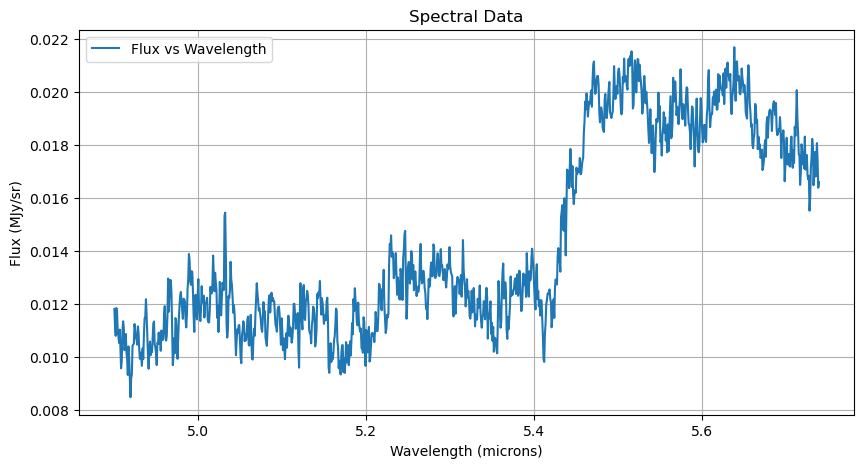

In [18]:
wavelength = data1d['WAVELENGTH']
flux = data1d['FLUX']
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, label='Flux vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (MJy/sr)')
plt.title('Spectral Data')
plt.legend()
plt.grid()
plt.show()

### x1d nirspec

In [19]:
data3 = fits.open('jw02057-o010_t005_nirspec_g140m-f100lp_x1d.fits')
data3.info()

Filename: jw02057-o010_t005_nirspec_g140m-f100lp_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     364   ()      
  1  EXTRACT1D     1 BinTableHDU     69   1447R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  2  ASDF          1 BinTableHDU     11   1R x 1C   [38876B]   


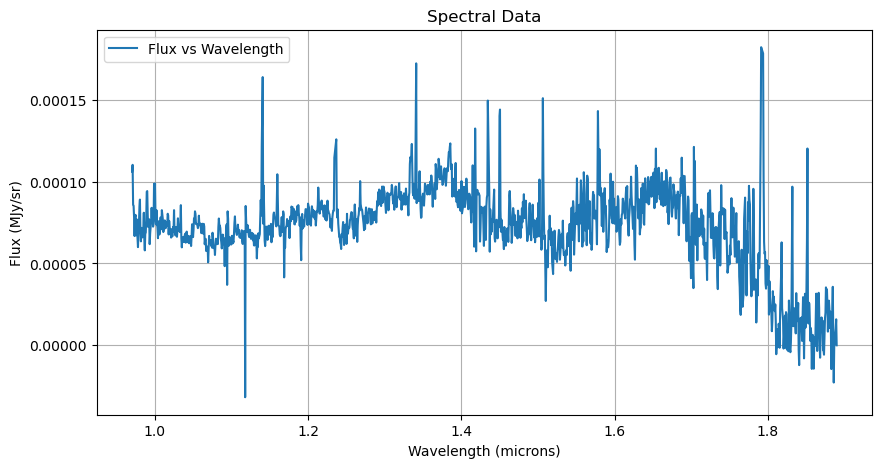

In [21]:
data1d = data3[1].data
wavelength = data1d['WAVELENGTH']
flux = data1d['FLUX']

# Mask out flux values above the 99th percentile
max_percentile = 99
threshold = np.percentile(flux, max_percentile)
mask = flux <= threshold

plt.figure(figsize=(10, 5))
plt.plot(wavelength[mask], flux[mask], label='Flux vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (MJy/sr)')
plt.title('Spectral Data')
plt.legend()
plt.grid()
plt.show()